<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Train-test" data-toc-modified-id="Train-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Train test</a></span></li><li><span><a href="#Init-test" data-toc-modified-id="Init-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Init test</a></span></li><li><span><a href="#crop-test" data-toc-modified-id="crop-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>crop test</a></span></li></ul></div>

In [1]:
import torch
import clip
from PIL import Image

ModuleNotFoundError: No module named 'clip'

In [2]:
print("Torch version:", torch.__version__)


Torch version: 1.8.0


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _ = clip.load("ViT-B/32", device=device)

In [8]:
image = preprocess(Image.open("data/train_images/0000a68812bc7e98c42888dfb1c07da0.jpg")).unsqueeze(0).to(device)

In [15]:
??preprocess

In [14]:
clip.available_models()

['RN50', 'RN101', 'RN50x4', 'ViT-B/32']

## Train test

In [1]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
import clip
np.random.seed(1337)
device = torch.device('cuda')

In [2]:
df, train_df, val_df, train_labels, val_labels = load_data(train_perc=0.3)

In [3]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_300/'
small_images_dir_val = 'data/small_train_images_224/'
bs = 64

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
#full_dl = create_dl(df, small_images_dir, shuffle=False)

In [4]:
class CLIPImg(torch.nn.Module) :
    def __init__(self, model_name="ViT-B/32", device='cuda') :
        super().__init__()
        self.model = clip.load(model_name, device=device, jit=False)[0]
    def forward(self, imgs) :
        return self.model.encode_image(imgs)

In [5]:
model = CLIPImg()
train_tfms, val_tfms = get_tfms(crop=224)

centers = compute_centers(tr_test_dl, model, val_tfms, train_df)
torch.save(centers, 'data/clip/centers_im_0.3.pth')

In [6]:
centers = torch.load('data/clip/centers_im_0.3.pth')

In [7]:
metric_fc = ArcMarginProduct(512, train_df['label_group'].nunique(), 
                             s=30, m=0.5, easy_margin=False, centers=None, half=True).to(device)

Using random weights


In [8]:
n_epochs, lf, params, optimizer, sched = get_hparams(tr_dl, model, metric_fc, lr=1e-4, n_epochs=15)

In [9]:
loss_hist = []
best_thr_score={'val': {'thr': None, 'f1': None}, 'train': {'thr': None, 'f1': None}}
thr_score_hist=[]
ep_start = 0
save_path = 'data/clip/test_8ap'

In [11]:
best_thr_score, thr_score_hist, losses = train(model, optimizer, lf, sched, metric_fc, tr_dl, val_dl,
                                               n_epochs, train_df, val_df, train_tfms, val_tfms, 
                                               save_path=save_path, 
                                               prev_best_info=best_thr_score, info_history=thr_score_hist,
                                               ep_start=ep_start, half_precision=True)
loss_hist.append(losses)
ep_start += n_epochs

james
None
james
None
james
None
james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

james
None
james
None
james
None
james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

james
None
james
None
james
None
james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

james
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       dtype=torch.float16)
james
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       dtype=torch.float16)
james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

james
None
james
None
james
None
james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

james
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       dtype=torch.float16)
james
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       dtype=torch.float16)
james
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

james
None
james
None
james
None
james


KeyboardInterrupt: 

In [ ]:
%debug

> /home/louis/anaconda3/lib/python3.7/site-packages/torch/cuda/amp/grad_scaler.py(199)_unscale_grads_()
    197                     continue
    198                 if (not allow_fp16) and param.grad.dtype == torch.float16:
--> 199                     raise ValueError("Attempting to unscale FP16 gradients.")
    200                 with torch.no_grad():
    201                     if param.grad.is_sparse:

ipdb> param.grad.dtype == torch.float16
True
ipdb> allow_fp16
False


In [13]:
torch.save(metric_fc, 'data/image_models/arcmarg_14ep_0.3.pth')

In [10]:
def plot_hist(history) : 
    train_scores = [info['train']['f1'] for info in history]
    train_thr = [info['train']['thr'] for info in history]
    val_scores = [info['val']['f1'] for info in history]
    val_thr = [info['val']['thr'] for info in history]
    x = range(len(train_scores))
    plt.plot(x, val_scores, label='val_score')
    plt.plot(x, train_scores, label='train_score')
    plt.legend()
    plt.show()
    plt.plot(x, val_thr, label='val_thr')
    plt.plot(x, train_thr, label='train_thr')
    plt.legend()
    plt.show()

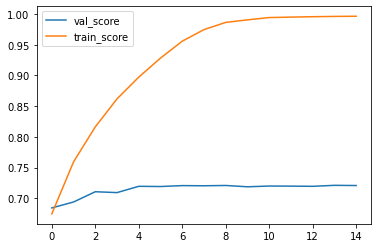

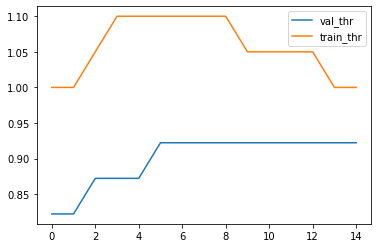

In [11]:
plot_hist(thr_score_hist)

## Init test

In [1]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
import clip
np.random.seed(1337)
device = torch.device('cuda')

In [2]:
df, train_df, val_df, train_labels, val_labels = load_data(train_perc=0.3)

In [12]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_300/'
small_images_dir_val = 'data/small_train_images_224/'
bs = 64

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
full_dl = create_dl(df, small_images_dir_val, shuffle=False)

In [4]:
model, _ = clip.load("ViT-B/32", device=device)
train_tfms, val_tfms = get_tfms(crop=224)

In [5]:
imgs, labels = next(iter(val_dl))

In [19]:
model.eval()
with torch.no_grad():
    pbar = tqdm(full_dl, leave=False)
    embs = []
    for imgs, _ in pbar:
        imgs = val_tfms(imgs).to('cuda')
        feature = model.encode_image(imgs)
        embs.append(feature)
    embs = torch.cat(embs, 0)

In [34]:
list(model.named_parameters())

[('positional_embedding',
  tensor([[-1.4361e-03,  1.9820e-04, -4.1244e-03,  ..., -3.6505e-03,
           -3.4988e-03,  1.5722e-04],
          [ 3.5358e-04,  2.0378e-03,  1.1401e-03,  ..., -9.8163e-04,
            2.5043e-03,  7.1525e-04],
          [-3.6177e-04,  1.5840e-03,  1.8298e-04,  ...,  3.2474e-05,
           -5.8654e-03,  2.4234e-03],
          ...,
          [ 3.9403e-03,  4.3212e-03, -3.6539e-02,  ...,  2.2139e-03,
           -2.4105e-03, -5.3089e-03],
          [ 6.7252e-03,  3.6138e-03, -3.5063e-02,  ..., -2.9890e-03,
           -8.3040e-06, -4.3714e-03],
          [ 6.5732e-04,  1.2495e-02, -7.1374e-03,  ...,  1.8150e-02,
            4.6621e-04, -2.5021e-02]], device='cuda:0', requires_grad=True)),
 ('text_projection',
  tensor([[-0.0104,  0.0142, -0.0084,  ..., -0.0069, -0.0125,  0.0012],
          [ 0.0054,  0.0013, -0.0036,  ...,  0.0026,  0.0136, -0.0201],
          [ 0.0029,  0.0031,  0.0182,  ...,  0.0034,  0.0052, -0.0063],
          ...,
          [ 0.0094,  0.03

In [16]:
scores = compute_f1(embs, df['label_group'], np.linspace(0.1, 1, 10))

({0.1: 0.52218162386465,
  0.2: 0.5579105039307131,
  0.30000000000000004: 0.5848323328654753,
  0.4: 0.6069105909804782,
  0.5: 0.614264067140977,
  0.6: 0.5502477861353194,
  0.7000000000000001: 0.3986040246179388,
  0.8: 0.23692260643308005,
  0.9: 0.1550686946676618,
  1.0: 0.1379424825416101},
 0.5,
 0.614264067140977)

In [17]:
scores = compute_f1(embs, df['label_group'], np.linspace(0.4, 0.6, 10))

In [18]:
scores

({0.4: 0.6069105909804782,
  0.4222222222222222: 0.6106623195460593,
  0.4444444444444445: 0.6140032738695708,
  0.4666666666666667: 0.6154601211497774,
  0.4888888888888889: 0.615526613505957,
  0.5111111111111111: 0.611713775042337,
  0.5333333333333333: 0.6035789859475235,
  0.5555555555555556: 0.5918404855796174,
  0.5777777777777777: 0.5739143899159265,
  0.6: 0.5502477861353194},
 0.4888888888888889,
 0.615526613505957)

## crop test

In [1]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
import clip
np.random.seed(1337)
device = torch.device('cuda')

In [2]:
df, train_df, val_df, train_labels, val_labels = load_data(train_perc=0.3)

In [18]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_548/'
small_images_dir_val = 'data/small_train_images_548/'
bs = 64

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
full_dl = create_dl(df, small_images_dir_val, shuffle=False)

In [4]:
model, _ = clip.load("ViT-B/32", device=device)
train_tfms, val_tfms = get_tfms(crop=224)

In [5]:
crop = transforms.FiveCrop(224)

In [55]:
model.eval()
with torch.no_grad():
    pbar = tqdm(full_dl, leave=False)
    embs = []
    for imgs, _ in pbar:
        imgs = val_tfms(imgs).to('cuda')
        bs = imgs.shape[0]
        imgs = torch.stack(crop(imgs)).reshape(-1, 3, 224, 224)
        feature = model.encode_image(imgs)
        embs.append(feature.reshape(bs, 5, -1).mean(1))
    embs = torch.cat(embs, 0)

In [19]:
imgs, labels = next(iter(tr_dl))

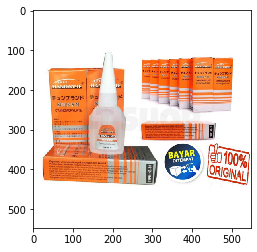

In [20]:
plt.imshow(imgs[1].permute(1, 2, 0))

In [21]:
imgs_cr = crop(imgs)

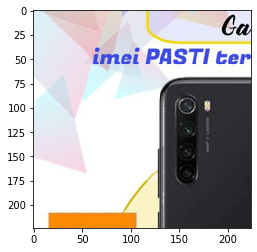

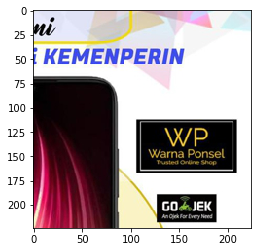

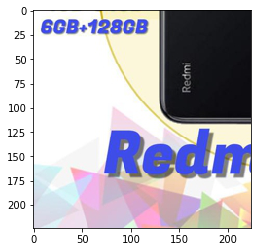

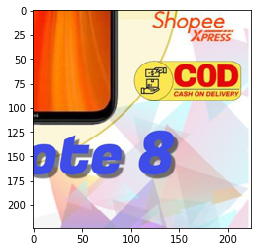

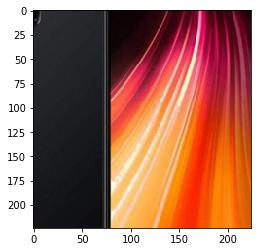

In [22]:
for i in range(5) :
    plt.imshow(imgs_cr[i][0].permute(1, 2, 0))
    plt.show()

In [12]:
imgs_cr.shape

torch.Size([320, 3, 224, 224])

In [23]:
for model in clip.available_models() :
    model, pr = clip.load(model, device=device)
    print(pr)
  

 10%|███▋                                  | 25.2M/256M [00:05<00:53, 4.34MiB/s]


KeyboardInterrupt: 

In [24]:
clip.available_models()

['RN50', 'RN101', 'RN50x4', 'ViT-B/32']

In [27]:
model, pr = clip.load('RN50x4', device=device)

100%|███████████████████████████████████████| 422M/422M [00:41<00:00, 10.1MiB/s]


In [28]:
pr

Compose(
    Resize(size=288, interpolation=PIL.Image.BICUBIC)
    CenterCrop(size=(288, 288))
    <function _transform.<locals>.<lambda> at 0x7fbbf7f1c9e0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)